---
title: Glyphs
date: 2023-12-301
authors:
  - name: Sébastien Boisgérault
    email: Sebastien.Boisgerault@minesparis.psl.eu
    url: https://github.com/boisgera
    affiliations:
      - institution: Mines Paris - PSL University
        department: Institut des Transformation Numériques (ITN)
github: boisgera
license: CC-BY-4.0
open_access: true
---

## Glyph Representation

![](images/z.tldraw.png)

```{exercise} Glyph Skeleton

 1. Create a new tldraw document with a unique continuous short curve created with the draw tool (called in the sequel a *glyph*).

 2. Load the document in Python and extract from it the unique record of type `draw`.

 3. Build from this record the arrays `x` and `y` of the points coordinates that describe the curve.

    ⚠️ Make sure that you get the initial values `x[0]` and `y[0]` right!

 5. Plot the curve using an aspect ratio of 1 ; make sure that your conventions for the y axis match those of tldraw.

```

<function matplotlib.pyplot.show(close=None, block=None)>

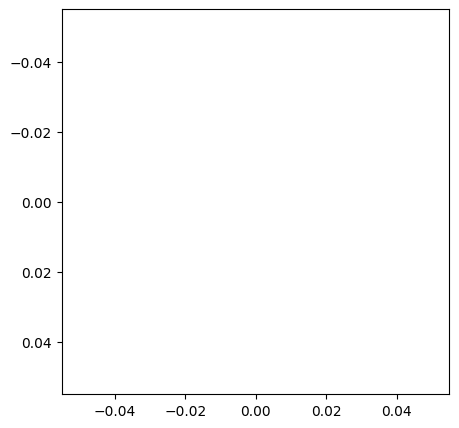

In [15]:
import matplotlib.pyplot as plt

"""1"""
""" document : glyph.tldr """

"""2"""

path = "glyph.tldr"
file = open(path, 'r')
tldraw_lines = file.readlines()


draw_record = []
in_draw_section = False

for line in tldraw_lines:
    if line.strip().startswith("draw"):
        in_draw_section = True
    elif in_draw_section:
        if line.strip() == "":
            break
        draw_record.append(line.strip())


"""3"""

x_list = []
y_list = []
for point in draw_record:
    x_list.append(point[0])
    y_list.append(point[1])

"""4"""

plt.figure(figsize=(5, 5))  
plt.plot(x_list, y_list)

plt.gca().invert_yaxis()

plt.show


![](images/z-skeleton-only.jpg)

The curve that you have plotted only represents a "skeleton" of the glyph but not its thickness. 
The thickness itself is computed from an evaluation of the speed at which the pen travels (the faster the pen is, the smaller the curve is ; this is how the pen pressure is simulated).

```{exercise} Glyph Outline
 1. Make a new continuous curve that you draw during 6 seconds (the more precise the better ! I would advise you to use a stopwatch) ; try to move constantly when you draw the curve at first (for the initial 3 seconds) then faster (for the final 3 seconds). Then, extract the corresponding coordinates `x` and `y` in Python and make an informed guess on how these values are sampled from the "true" time-dependent curve.

 2. The `perfect-freehand` python package ports to Python the Javascript library used by tldraw to draw the curves contour. It is [available on pypi](https://pypi.org/project/perfect-freehand/) and [documented](https://bigbluebutton.github.io/perfect-freehand-python/). Use it to represent on the same matplotlib display the skeleton points and a corresponding contour.
```

![](images/z-outline.jpg)


## Glyph Classification


![](images/glyphs-reference.png)




```{exercise} Glyph Collection
 1. Create a tldraw document that contains many small variations of the same glyph as depicted above. Pick a glyph of your chosing!
    Save it as `docs/glyphs.tldr`.
 
    ⚠️ If you have a ✍️ pen tablet, use it; otherwise you're probably better off using your 👆 finger on a tablet / mobile phone than a 🖱️ mouse to get a collection of similar glyphs.
 2. Draw all these glyph variants in matplotib ; translate them beforehand so that they have the same center of mass and are (mostly but not entirely) superimposed.
```

![](images/glyphs-superimposed.jpg)

Each glyph may have a different number of samples, so its hard to compare them directly. Additionally they may be a bit rough and could probably use a smoother and denser representation (with many more points).

```{exercise} Interpolation and Resampling
 1. Associate to any glyph represented by its coordinate a path $t \in [0, 1] \mapsto \mathbb{R}^2$ (as a Python function), using some "smooth" interpolation.
 
    **Hint:** use [`scipy.interpolate.interp1d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html).
 
 2. Sample it uniformly to get exactly 1000 points.

```



```{exercise} Mean Glyph
 1. Use the set of resampled coordinates to compute the (resampled) "mean glyph" that averages the features of all glyphs. 
 2. Draw this glyph !
```

![](images/glyphs-mean.jpg)

```{exercise} Glyph Similarity

 1. Come up with a scalar measure of the "dissimilarity" between two resampled glyphs (2 arrays of 1000 points), which is equal to 0 when both glyphs are identical and gets larger as the glyphs become more different.

 2. Compute the dissimilarity between each glyph and the mean glyph and compute the maximal dissimilarity for our collection of small variants.
```


```{exercise} Glyph Classification

 1. Create a document with several glyphs similar to the reference one and several ones wich are dissimilar. Save it as `docs/glyphs-misc.tldr".

 2. Generate automatically a new tldraw document `docs/glyphs-classified.tldr` with the same set of glyphs, but such that the glyphs are green when they are similar to the reference one and red if they are dissimilar.
```


![](images/glyphs-misc.png)

![](images/glyphs-misc-checked.png)